# Ecommerce Project

This project is about to predict the action that will do the customer in a web page

In [150]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import plotly.plotly as py
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='gaston.farina', api_key='qp2zUcv3i5fIvwcecMhb')
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
Ecommerce = pd.read_csv("ecommerce_data.csv")
Ecommerce.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


## Variables

The variables are:

`is_mobile`: if the user uses a mobile or not

`n_products_viewed` : Is the number of products that the user viewed

`visit_duration`:  how long is the Visit duration in minutes

`is_returning_visitor`:  a boolean variable

`time_of_day`:  Time of the day (0,1,2,3 split the 24hours)

`user_action`:  Time of the day (bounce,addtocar,begin_checkout,finishCheckout) this is the outcome variable





In [152]:
def NormalizeData(Vect):
    Vec = (Vect-Vect.mean())/Vect.std()
    return Vec

def OneHotEncoding(Vect):
    Vect = pd.get_dummies(Vect,prefix="time_of_day")
    return Vect

def DataProc(Base):
    Base['n_products_viewed'] = NormalizeData(Base['n_products_viewed'])
    Base['visit_duration'] = NormalizeData(Base['visit_duration'])
    OneHotTime = OneHotEncoding(Ecommerce['time_of_day'])
    Base = pd.concat([Base,OneHotTime], axis=1)
    Base = Base[['is_mobile','n_products_viewed','visit_duration','is_returning_visitor','time_of_day_0',
            'time_of_day_1','time_of_day_2','time_of_day_3','user_action']]
    Base = Base[Base['user_action']<=1]
    X = Base[['is_mobile','n_products_viewed','visit_duration','is_returning_visitor','time_of_day_0',
            'time_of_day_1','time_of_day_2','time_of_day_3']].as_matrix()
    Y = Base['user_action'].as_matrix()
    return(X,Y)

## Foward Pass with Random weights

The forward pass is $\hat{Y} = W \cdot X + b$ then the classification is with $\sigma \left(\hat{Y} \right)$ the classification rate is roughly $50 \%$

In [153]:
X,Y = DataProc(Ecommerce)
D = X.shape[1]
n = X.shape[0]
W = np.random.randn(D).reshape((D,1))
b = 0

def ForwardPass(X,W,b):
    Yhat = np.dot(X,W)+b
    return Yhat

def Sigmoid(Yhat):
    return 1/(1+np.exp(-Yhat))

def ClassificationRate(Y,Yhat):
    return np.mean(Y==Yhat)

Yhat = ForwardPass(X,W,b)
ClassYhat = Sigmoid(Yhat)
PredYhat = 1*(ClassYhat>0.5)
Rate = ClassificationRate(Y,PredYhat)

print("The classification Rate is: " + str(Rate))


The classification Rate is: 0.460455544052


## Train The Model

The shuffle function changes the position of the data and apply gradient descent to the linear classification model

![Title](GradientDescentLogistic.png)

In [171]:
X,Y = shuffle(X,Y)
W = np.random.randn(D).reshape((D,1))
b = 0

def GetTrainTest(X,Y,thresh):
    n_train = int(X.shape[0]*thresh)
    n_test = int(X.shape[0]-n_train)
    X_train = X[:n_train,:]
    Y_train = Y[:n_train]
    X_test = X[n_test:,:]
    Y_test = Y[n_test:]
    return X_train,Y_train,X_test,Y_test

def CrossEntropyError(TrueY,ProbY):
    return -np.mean(TrueY*np.log(ProbY)+(1-TrueY)*np.log(1-ProbY))

X_Train,Y_Train,X_Test,Y_Test = GetTrainTest(X,Y,0.8)
Y_Train = Y_Train.reshape((len(Y_Train),1))
Y_Test = Y_Test.reshape((len(Y_Test),1))

TrainCost = []
TestCost = []
lr = 0.001
for i in range(10000):
    PyTrain = Sigmoid(ForwardPass(X_Train,W,b))
    PyTest = Sigmoid(ForwardPass(X_Test,W,b))
    Error_Train = CrossEntropyError(Y_Train,PyTrain)
    Error_Test = CrossEntropyError(Y_Test,PyTest)
    TrainCost.append(Error_Train)
    TestCost.append(Error_Test)
    W -= lr*np.dot(X_Train.T,(PyTrain-Y_Train))
    b -= lr*np.sum((PyTrain-Y_Train))
    if i % 1000 == 0:
        print("Iteration is: " + str(i) + " Error Train is : " + str(Error_Train) + " Error Test is: "+ str(Error_Test))
PredTrainYhat = 1*(PyTrain>0.5)
PredTestYhat = 1*(PyTest>0.5)
print("Classification Rate In The Train Set Is: " + str(ClassificationRate(Y_Train,PredTrainYhat))) 
print("Classification Rate In The Test Set Is: " + str(ClassificationRate(Y_Test,PredTestYhat)))   
    


Iteration is: 0 Error Train is : 0.98161752492 Error Test is: 0.973211649904
Iteration is: 1000 Error Train is : 0.169754257389 Error Test is: 0.188850422045
Iteration is: 2000 Error Train is : 0.167780486241 Error Test is: 0.189989286925
Iteration is: 3000 Error Train is : 0.167579036005 Error Test is: 0.190836541936
Iteration is: 4000 Error Train is : 0.167552273273 Error Test is: 0.191196612792
Iteration is: 5000 Error Train is : 0.167548418761 Error Test is: 0.191340143747
Iteration is: 6000 Error Train is : 0.167547847302 Error Test is: 0.1913964043
Iteration is: 7000 Error Train is : 0.167547761649 Error Test is: 0.191418333311
Iteration is: 8000 Error Train is : 0.167547748757 Error Test is: 0.191426863101
Iteration is: 9000 Error Train is : 0.167547746814 Error Test is: 0.191430178361
Classification Rate In The Train Set Is: 0.977987421384
Classification Rate In The Test Set Is: 0.959119496855


## Plotting the Error Curves|

In [172]:
TrainCost = np.array(TrainCost)
TestCost = np.array(TestCost)

trace = go.Scatter(
    x = np.arange(len(TrainCost)) ,
    y = TrainCost,
    mode = 'lines',
    name = 'Train Error'
    
)
trace1 = go.Scatter(
    x = np.arange(len(TestCost)),
    y = TestCost,
    mode = 'lines',
    name = 'Test Error'
)
layout = dict(title = 'Comparing Errors',
              xaxis=dict(
                   title='Itertions'
             ),
                yaxis=dict(
                   title='Error'
             )
  )
              

data = [trace,trace1]
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='TrainTest')


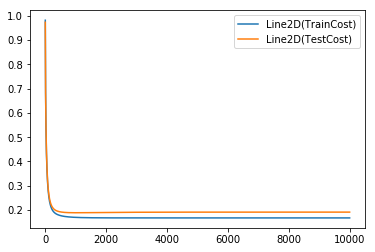

In [173]:
legend1, = plt.plot(TrainCost,label="TrainCost")
legend2, = plt.plot(TestCost,label="TestCost")
plt.legend([legend1,legend2])
plt.show()